# Matplotlib

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

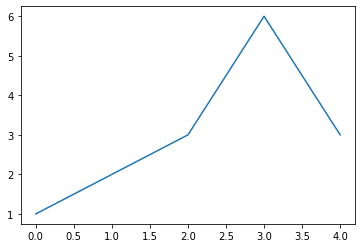

In [3]:
plt.plot([1, 2, 3, 6, 3])

(-4.0, 6.0, 0.0, 7.0)

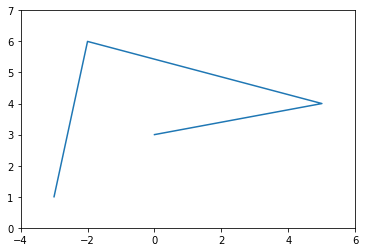

In [4]:
plt.plot([-3, -2, 5, 0], [1, 6, 4, 3])
plt.axis([-4, 6, 0, 7])

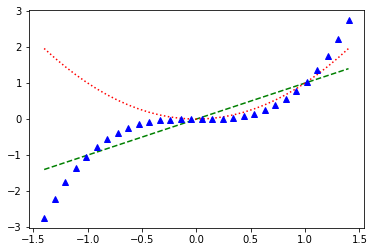

In [5]:
x = np.linspace(-1.4, 1.4, 30)
plt.plot(x, x, 'g--', x, x**2, 'r:', x, x**3, 'b^')
plt.show()

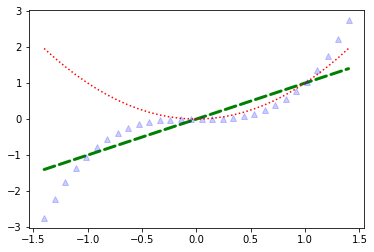

In [6]:
x = np.linspace(-1.4, 1.4, 30)
line1, line2, line3 = plt.plot(x, x, 'g--', x, x**2, 'r:', x, x**3, 'b^')
line1.set_linewidth(3.0)
line1.set_dash_capstyle("round")
line3.set_alpha(0.2)
plt.show()

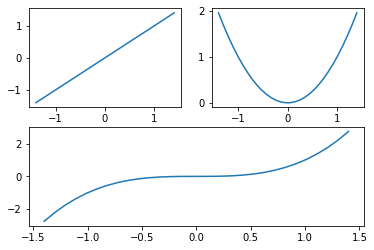

In [7]:
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot = top left
plt.plot(x, x)
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot = top right
plt.plot(x, x**2)
plt.subplot(2, 1, 2)  # 2 rows, *1* column, 2nd subplot = bottom
plt.plot(x, x**3)

# Pyplot explicit calls

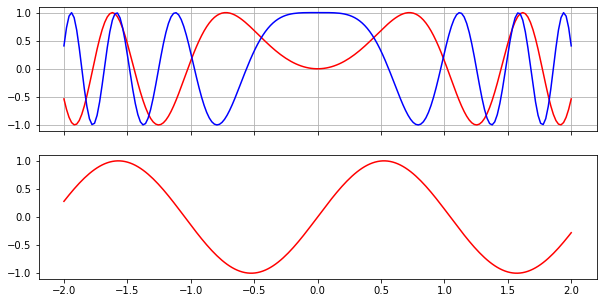

In [8]:
x = np.linspace(-2, 2, 200)
fig1, (ax_top, ax_bottom) = plt.subplots(2, 1, sharex=True)
fig1.set_size_inches(10, 5)

line1, line2 = ax_top.plot(x, np.sin(3*x**2), "r-", x, np.cos(5*x**2), "b-")
line3 = ax_bottom.plot(x, np.sin(3*x), "r-")

ax_top.grid(True)

# Ticks and tickers

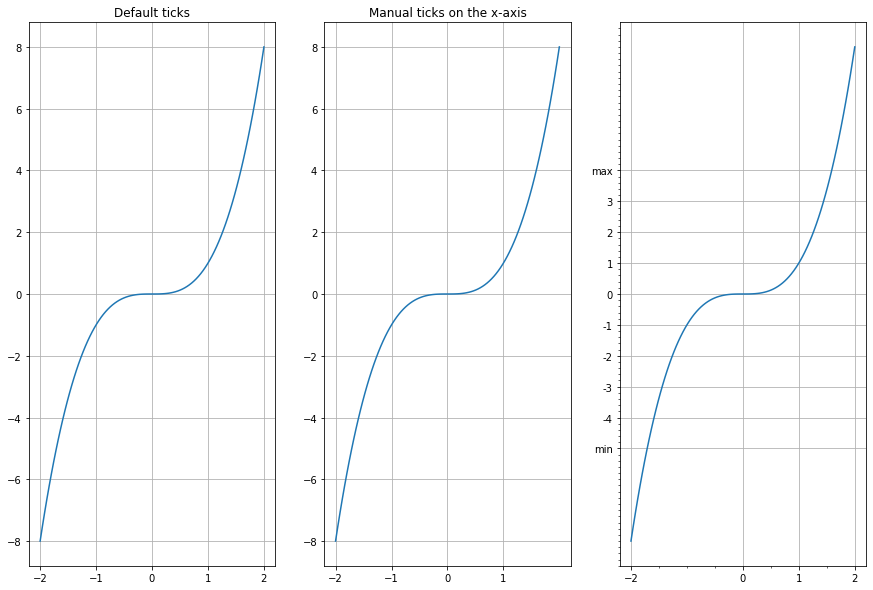

In [9]:
x = np.linspace(-2, 2, 100)

plt.figure(1, figsize=(15, 10))
plt.subplot(131)
plt.plot(x, x**3)
plt.grid(True)
plt.title('Default ticks')

ax = plt.subplot(132)
plt.plot(x, x**3)
ax.xaxis.set_ticks(np.arange(-2, 2, 1))
plt.grid(True)
plt.title("Manual ticks on the x-axis")

ax = plt.subplot(133)
plt.plot(x, x**3)
plt.minorticks_on()
ax.tick_params(axis='x', which='minor', bottom='off')
ax.xaxis.set_ticks([-2, 0, 1, 2])
ax.yaxis.set_ticks(np.arange(-5, 5, 1))
ax.yaxis.set_ticklabels(["min", -4, -3, -2, -1, 0, 1, 2, 3, "max"])
plt.grid(True)

# 3D projection

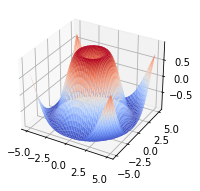

In [18]:
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

figure = plt.figure(1, figsize=(12, 3))
subplot3d = plt.subplot(111, projection='3d')
surface = subplot3d.plot_surface(X,Y,Z, rstride=1, cstride=1, cmap=mpl.cm.coolwarm, linewidth=0.1)

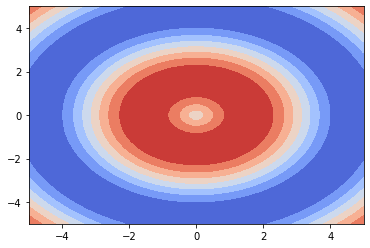

In [19]:
plt.contourf(X, Y, Z, cmap=mpl.cm.coolwarm)

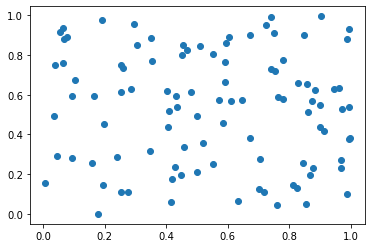

In [20]:
from numpy.random import rand

x, y = rand(2, 100)
plt.scatter(x, y)

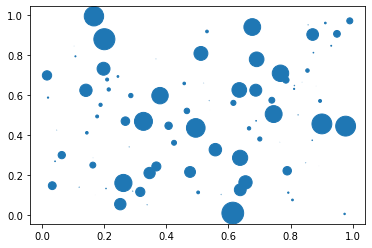

In [21]:
x, y, scale = rand(3, 100)
scale = 500 * scale**5
plt.scatter(x, y, s=scale)

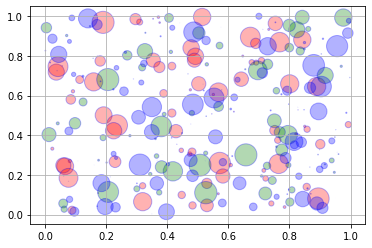

In [22]:
for color in ['red','green', 'blue']:
    n = 100
    x, y = rand(2, n)
    scale = 500 * rand(n) ** 5
    plt.scatter(x, y, s=scale, c=color, alpha=0.3, edgecolors='blue')

plt.grid(True)

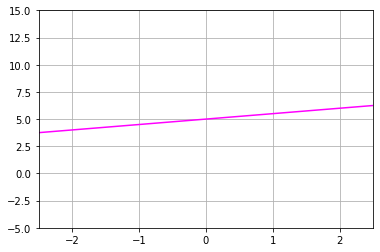

In [27]:
from numpy.random import randn

def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)
    
x = randn(1000)
y = 0.5*x + 5 + randn(1000)*2

plt.axis([-2.5, 2.5, -5, 15])
# plt.scatter(x, y, alpha=0.2)
# plt.plot(1, 0, "ro")
# plt.vlines(1, -5, 0, color="red")
# plt.hlines(0, -2.5, 1, color="red")
plot_line(axis=plt.gca(), slope=0.5, intercept=5, color="magenta")
plt.grid(True)

# Histograms

(array([2., 1., 2., 4.]),
 array([1. , 1.5, 2. , 2.5, 3. ]),
 <BarContainer object of 4 artists>)

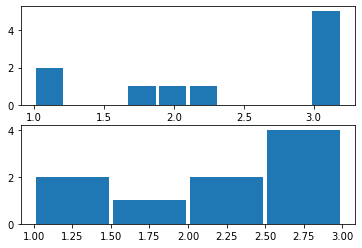

In [31]:
data = [1, 1.1, 1.8, 2, 2.1, 3.2, 3, 3, 3, 3]
plt.subplot(211)
plt.hist(data, bins=10, rwidth=0.9)

plt.subplot(212)
plt.hist(data, bins = [1, 1.5, 2, 2.5, 3], rwidth=0.95)


# Images

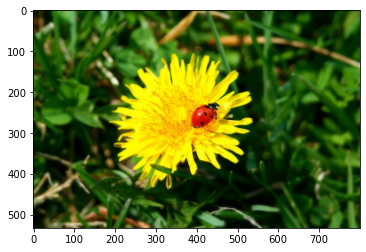

In [32]:
img = plt.imread('./images/ladybug.png')
plt.imshow(img)

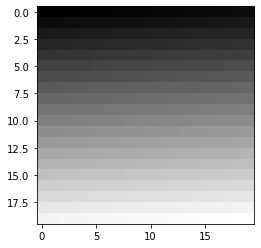

In [44]:
img = np.arange(20*20).reshape(20, 20)
plt.imshow(img, cmap='gray')

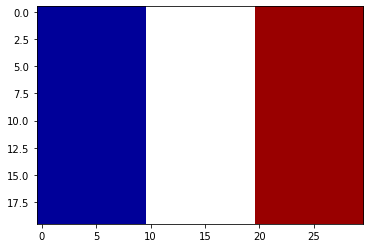

In [40]:
img = np.empty((20,30,3))
img[:, :10] = [0, 0, 0.6]
img[:, 10:20] = [1, 1, 1]
img[:, 20:] = [0.6, 0, 0]
plt.imshow(img)

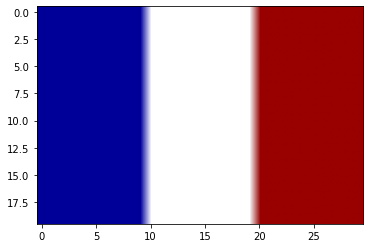

In [41]:
plt.imshow(img, interpolation='bilinear')

# Animations

In [48]:
import matplotlib.animation as animation


x = np.linspace(-1, 1, 100)
y = np.sin(x**2*25)
data = np.array([x, y])

fig = plt.figure()
line, = plt.plot([], [], "r-") # start with an empty plot
plt.axis([-1.1, 1.1, -1.1, 1.1])
plt.plot([-0.5, 0.5], [0, 0], "b-", [0, 0], [-0.5, 0.5], "b-", 0, 0, "ro")
plt.grid(True)
plt.title("Marvelous animation")

# this function will be called at every iteration
def update_line(num, data, line):
    line.set_data(data[..., :num] + np.random.rand(2, num) / 25)  # we only plot the first `num` data points.
    return line,

line_ani = animation.FuncAnimation(fig, update_line, frames=50, fargs=(data, line), interval=100)
# plt.close() # call close() to avoid displaying the static plot